Number of images in Demented directory: 3018
Number of images in NonDemented directory: 3200


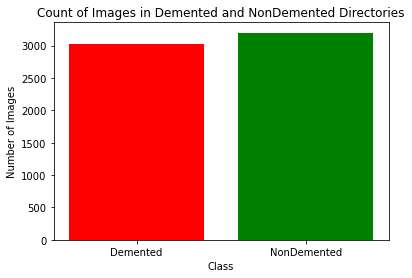

In [1]:
import os
import matplotlib.pyplot as plt

def count_images_in_directory(directory):
    image_count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_count += 1
    return image_count

# Example usage:
data_dir = r"/home/lab5/Downloads/combined"
demented_dir = os.path.join(data_dir, 'Demented')
non_demented_dir = os.path.join(data_dir, 'NonDemented')

num_demented_images = count_images_in_directory(demented_dir)
num_non_demented_images = count_images_in_directory(non_demented_dir)

# Print counts
print("Number of images in Demented directory:", num_demented_images)
print("Number of images in NonDemented directory:", num_non_demented_images)

# Plotting
labels = ['Demented', 'NonDemented']
counts = [num_demented_images, num_non_demented_images]

plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Count of Images in Demented and NonDemented Directories')
plt.show()


In [2]:
# pip install opencv-python

In [3]:
import os
import cv2
import numpy as np

def preprocess_image(image_path, target_size):
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize the image
    resized_image = cv2.resize(image, target_size)
    
    # Rescale the image (optional)
    resized_image = resized_image.astype('float32') / 255.0
    
    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    return grayscale_image

def preprocess_directory(directory, target_size):
    preprocessed_images = []
    labels = []
    label = 0 if directory.endswith('NonDemented') else 1  # Assign label based on directory name
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Ensure only image files are processed
            image_path = os.path.join(directory, filename)
            preprocessed_image = preprocess_image(image_path, target_size)
            preprocessed_images.append(preprocessed_image)
            labels.append(label)
    return preprocessed_images, labels

# Example usage:
target_size = (224,224)  # Specify your desired target size

demented_dir = os.path.join(data_dir, 'Demented')
non_demented_dir = os.path.join(data_dir, 'NonDemented')


preprocessed_demented_images, demented_labels = preprocess_directory(demented_dir, target_size)
preprocessed_non_demented_images, non_demented_labels = preprocess_directory(non_demented_dir, target_size)

# Combine the data from both directories
images = preprocessed_demented_images + preprocessed_non_demented_images
labels = demented_labels + non_demented_labels

# Now, all_images contains preprocessed image data and all_labels contains corresponding labels.
images = np.array(images)
labels = np.array(labels)



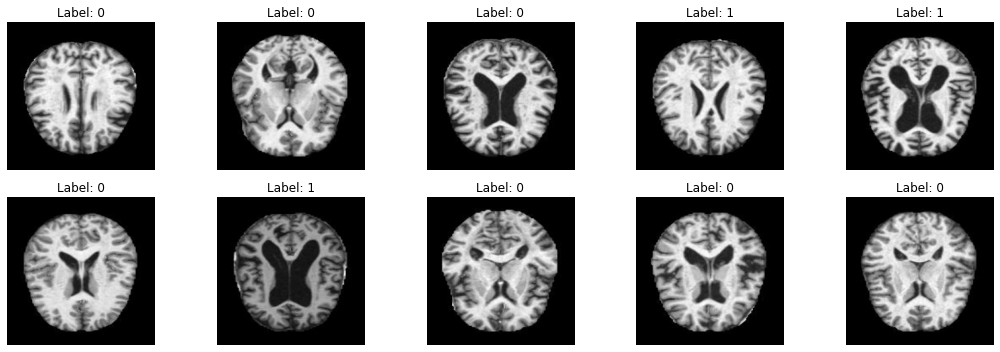

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = images[idx]
    label = labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i % 5 + 1 + (i // 5) * 5)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
# Separate data for Normal and Tuberculosis classes
# nonDemented_images = images[labels == 0][:3000]
# Demented_images = images[labels == 1][:3000]
# nonDemented_labels = labels[labels == 0][:3000]
# Demented_labels = labels[labels == 1][:3000]

# Concatenate the data back together
# balanced_images = np.concatenate([nonDemented_images, Demented_images])
# balanced_labels = np.concatenate([nonDemented_labels, Demented_labels])
# # Split the balanced dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)


# Split the data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)



#print the balanced data
print("Balanced Images:",images.shape)
print("Balanced labels:",labels.shape)

#print the data seperately of each class
# print("nonDemented_images:",nonDemented_images.shape)
# print("Demented_images:",Demented_images.shape)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_valid shape:", y_valid.shape)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Balanced Images: (6218, 224, 224)
Balanced labels: (6218,)
X_train shape: (4476, 224, 224)
X_valid shape: (498, 224, 224)
X_test shape: (1244, 224, 224)
y_train shape: (4476,)
y_test shape: (1244,)
y_valid shape: (498,)


In [11]:
# pip install tensorflow

# Base Model

2024-03-25 14:49:27.044078: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 14:49:27.091738: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 14:49:27.091757: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 14:49:27.091770: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-25 14:49:27.098766: I tensorflow/core/platform/cpu_feature_g

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 128)               1

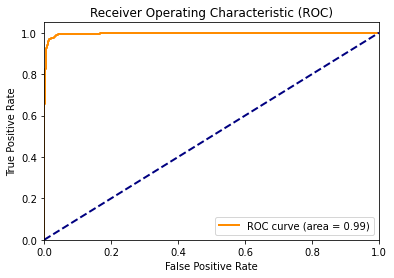

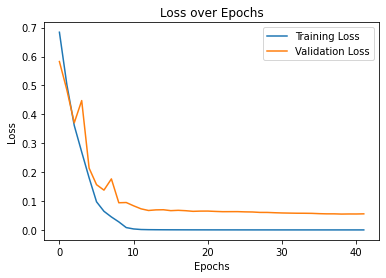

Accuracy: 0.9766881028938906
Precision: 0.9854604200323102
Recall: 0.9682539682539683
F1 Score: 0.9767814251401121
Confusion Matrix:
[[605   9]
 [ 20 610]]
Cohen's Kappa: 0.9533790978733961
Matthews Correlation Coefficient: 0.9535282015058347
Balanced Accuracy: 0.976797993898971
True Positives: 610
True Negatives: 605
False Positives: 9
False Negatives: 20
39/39 [==============================] - 1s 26ms/step - loss: 0.1236 - accuracy: 0.9767
Test Accuracy: 97.67%
Test Loss: 12.36%
execution time: 769.2985277175903


In [12]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import time
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Measure the start time
start_time = time.time()

# Assuming 'images' and 'labels' are your data
images = np.array(images)
labels = np.array(labels)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define the CNN model
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, batch_size=32, validation_data=(X_valid_resized, y_valid), verbose=1, callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Calculate Cohen's Kappa
total_agreements = conf_matrix[0, 0] + conf_matrix[1, 1]
total = np.sum(conf_matrix)
po = total_agreements / total
pe = ((np.sum(conf_matrix[0]) / total) * (np.sum(conf_matrix[:, 0]) / total)) + ((np.sum(conf_matrix[1]) / total) * (np.sum(conf_matrix[:, 1]) / total))
kappa = (po - pe) / (1 - pe)

# Calculate Matthews Correlation Coefficient
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# Calculate Balanced Accuracy
sensitivity = recall_score(y_test, predicted_labels)
specificity = tn / (tn + fp)
balanced_accuracy = (sensitivity + specificity) / 2

# Print Additional Metrics
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("execution time:",execution_time)

# Save metrics to DataFrame
metrics = {
    'Combination':'1',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Test Accuracy': test_accuracy * 100,
    'Test Loss': test_loss * 100,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    "Cohen's Kappa": kappa,
    'Matthews Correlation': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'True Positives': tp,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'Execution Time (s)': execution_time
}

metrics_df = pd.DataFrame(metrics, index=[0])

# Save DataFrame to CSV
metrics_df.to_csv('CNN_Final_50_metrics.csv', index=False)



# Base Model + Dropout

a Dropout layer with a dropout rate of 0.5 is added after the Dense layer with 128 neurons. This Dropout layer will randomly drop 50% of the neurons during each training epoch, helping to reduce overfitting and improving the generalization ability of your model.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

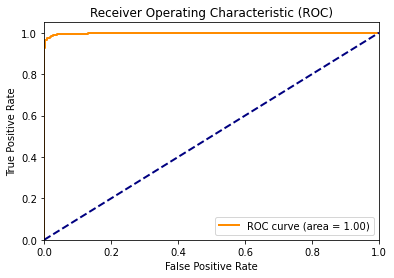

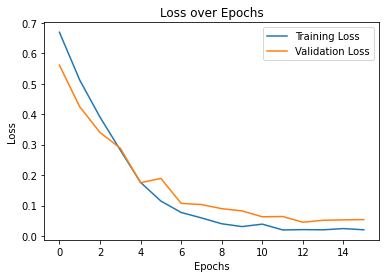

Accuracy: 0.9807073954983923
Precision: 0.9809523809523809
Recall: 0.9809523809523809
F1 Score: 0.9809523809523809
Confusion Matrix:
[[602  12]
 [ 12 618]]
Cohen's Kappa: 0.9614084070110129
Matthews Correlation: 0.9614084070110128
Balanced Accuracy: 0.9807042035055065
True Positives: 618
True Negatives: 602
False Positives: 12
False Negatives: 12
39/39 [==============================] - 1s 26ms/step - loss: 0.0649 - accuracy: 0.9807
Test Accuracy: 98.07%
Test Loss: 6.49%
execution time: 298.08310651779175
Metrics appended to metrics.csv file.


In [13]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import time

# Measure the start time
start_time = time.time()

# Assuming 'images' and 'labels' are your data
images = np.array(images)
labels = np.array(labels)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Define the CNN model with Dropout
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding a Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, batch_size=32, validation_data=(X_valid_resized, y_valid), verbose=1, callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("execution time:",execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('CNN_Final_50_metrics.csv')

# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['2'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('CNN_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")


# Base Model + Batch Normalization

2024-03-25 15:15:14.868362: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 15:15:15.064442: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 15:15:15.064461: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 15:15:15.065465: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-25 15:15:15.153110: I tensorflow/core/platform/cpu_feature_g

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

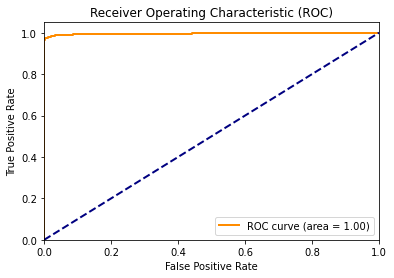

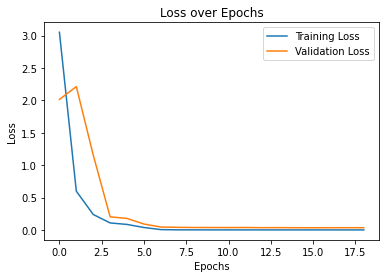

Accuracy: 0.9823151125401929
Precision: 0.9840764331210191
Recall: 0.9809523809523809
F1 Score: 0.9825119236883942
Confusion Matrix:
[[604  10]
 [ 12 618]]
Cohen's Kappa: 0.9646258362717017
Matthews Correlation: 0.9646308241891309
Balanced Accuracy: 0.9823328680006205
True Positives: 618
True Negatives: 604
False Positives: 10
False Negatives: 12
39/39 [==============================] - 2s 50ms/step - loss: 0.0771 - accuracy: 0.9823
Test Accuracy: 98.23%
Test Loss: 7.71%
execution time: 526.3380379676819
Metrics appended to metrics.csv file.


In [8]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time

# Measure the start time
start_time = time.time()

# Assuming 'images' and 'labels' are your data
images = np.array(images)
labels = np.array(labels)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define the CNN model with BatchNormalization
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),  # Adding BatchNormalization after Conv2D
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  # Adding BatchNormalization after Conv2D
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, batch_size=32, validation_data=(X_valid_resized, y_valid), verbose=1, callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("execution time:", execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('CNN_Final_50_metrics.csv')

# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['3'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}
new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('CNN_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")


# Base Model + Conv2D + Maxpooling2D

In [7]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import time

# Measure the start time
start_time = time.time()

# Assuming 'images' and 'labels' are your data
images = np.array(images)
labels = np.array(labels)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Define the CNN model with additional layers
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, batch_size=32, validation_data=(X_valid_resized, y_valid), verbose=1, callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("execution time:",execution_time)# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('CNN_Final_50_metrics.csv')

# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['4'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}
new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('CNN_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

NameError: name 'cohen_kappa_score' is not defined

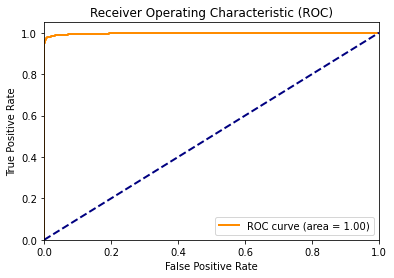

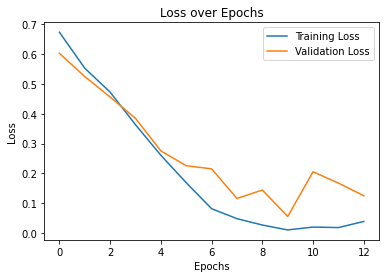

Accuracy: 0.9734726688102894
Precision: 1.0
Recall: 0.9476190476190476
F1 Score: 0.9731051344743277
Confusion Matrix:
[[614   0]
 [ 33 597]]
39/39 [==============================] - 1s 31ms/step - loss: 0.1092 - accuracy: 0.9735
Test Accuracy: 97.35%
Test Loss: 10.92%
execution time: 565.8406665325165
Metrics appended to metrics.csv file.


In [8]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("execution time:",execution_time)# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('CNN_Final_50_metrics.csv')

# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['4'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}
new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('CNN_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

# Base Model + Dropout + Conv2D + MaxPooling

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

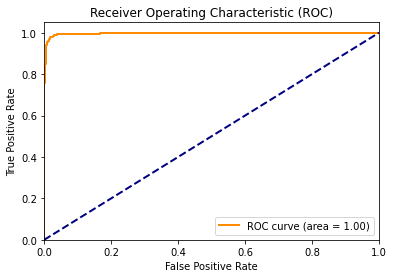

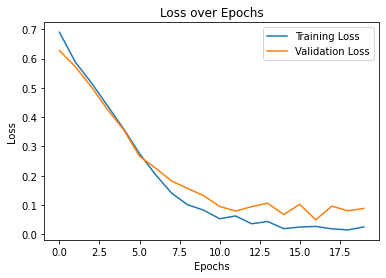

Accuracy: 0.979903536977492
Precision: 0.9793977812995246
Recall: 0.9809523809523809
F1 Score: 0.9801744647105471
Confusion Matrix:
[[601  13]
 [ 12 618]]
39/39 [==============================] - 1s 33ms/step - loss: 0.0675 - accuracy: 0.9799
Test Accuracy: 97.99%
Test Loss: 6.75%
execution time: 522.6114511489868
Metrics appended to metrics.csv file.


In [7]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import time
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Measure the start time
start_time = time.time()

# Assuming 'images' and 'labels' are your data
images = np.array(images)
labels = np.array(labels)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Define the CNN model with additional layers
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, batch_size=32, validation_data=(X_valid_resized, y_valid), verbose=1, callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("execution time:",execution_time)# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('CNN_Final_50_metrics.csv')

# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['5'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}
new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('CNN_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

# Base Model + Dropout + Conv2D + MaxPooling + Dense

In [6]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import time

# Measure the start time
start_time = time.time()

# Assuming 'images' and 'labels' are your data
images = np.array(images)
labels = np.array(labels)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Define the CNN model with additional layers
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),  # Added dense layer with 256 neurons
    Dropout(0.5),
    Dense(128, activation='relu'),  # Added dense layer with 128 neurons
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, batch_size=32, validation_data=(X_valid_resized, y_valid), verbose=1, callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("execution time:",execution_time)# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('CNN_Final_50_metrics.csv')
# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['6'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}
new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('CNN_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

2024-03-25 16:17:16.074421: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 16:17:16.266938: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 16:17:16.266960: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 16:17:16.267991: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-25 16:17:16.362726: I tensorflow/core/platform/cpu_feature_g

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

NameError: name 'cohen_kappa_score' is not defined

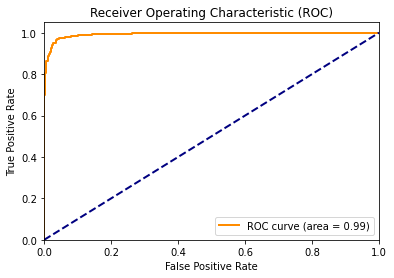

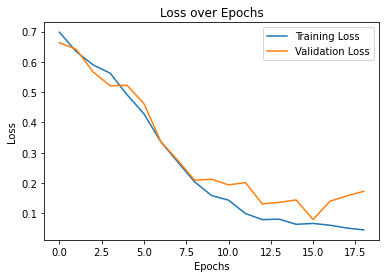

Accuracy: 0.9630225080385852
Precision: 0.9664536741214057
Recall: 0.9603174603174603
F1 Score: 0.9633757961783439
Confusion Matrix:
[[593  21]
 [ 25 605]]
39/39 [==============================] - 1s 31ms/step - loss: 0.1106 - accuracy: 0.9630
Test Accuracy: 96.30%
Test Loss: 11.06%
execution time: 640.7698557376862
Metrics appended to metrics.csv file.


In [7]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("execution time:",execution_time)# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('CNN_Final_50_metrics.csv')

# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['6'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}
new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('CNN_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

# Base Model + Dense + Dropout

In [6]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import time

# Measure the start time
start_time = time.time()

# Assuming 'images' and 'labels' are your data
images = np.array(images)
labels = np.array(labels)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Define the CNN model with additional layers
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),  # Added dense layer with 256 neurons
    Dropout(0.5),
    Dense(128, activation='relu'),  # Added dense layer with 128 neurons
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, batch_size=32, validation_data=(X_valid_resized, y_valid), verbose=1, callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("execution time:",execution_time)# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('CNN_Final_50_metrics.csv')

# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['7'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}
new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('CNN_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

2024-03-25 16:07:47.575495: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 16:07:47.768965: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 16:07:47.768984: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 16:07:47.770011: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-25 16:07:47.859315: I tensorflow/core/platform/cpu_feature_g

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 512)               4

NameError: name 'cohen_kappa_score' is not defined

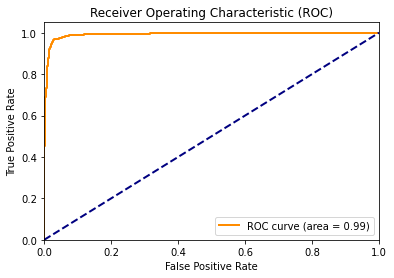

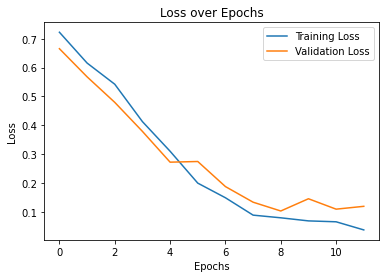

Accuracy: 0.9670418006430869
Precision: 0.9667194928684627
Recall: 0.9682539682539683
F1 Score: 0.9674861221252974
Confusion Matrix:
[[593  21]
 [ 20 610]]
39/39 [==============================] - 1s 30ms/step - loss: 0.1123 - accuracy: 0.9670
Test Accuracy: 96.70%
Test Loss: 11.23%
execution time: 526.9797358512878
Metrics appended to metrics.csv file.


In [7]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("execution time:",execution_time)# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('CNN_Final_50_metrics.csv')

# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['7'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}
new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('CNN_Final_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")